# [Customizing the density estimator](https://www.mackelab.org/sbi/tutorial/04_density_estimators/)

In [7]:
import torch

from sbi.inference import (SNPE, 
                           SNRE,
                           prepare_for_sbi)
from sbi.utils.get_nn_models import posterior_nn
import sbi.utils as utils

In [8]:
def linear_gaussian(theta):
    return theta + 1.0 + torch.randn_like(theta) * 0.1

num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), 
                         high=2*torch.ones(num_dim))
simulator, prior = prepare_for_sbi(linear_gaussian, prior)

# inference = SNPE(simulator, prior, density_estimator='maf')
inference = SNRE(simulator, prior, classifier='resnet')

posterior = inference(num_simulations=500, proposal=None)
x_o = torch.zeros(3,)
posterior_samples = posterior.sample((10000,), x=x_o)


Neural network successfully converged after 98 epochs.


Generating samples:  16%|█▋        | 1625/10000 [02:21<12:09, 11.48it/s]


KeyboardInterrupt: 

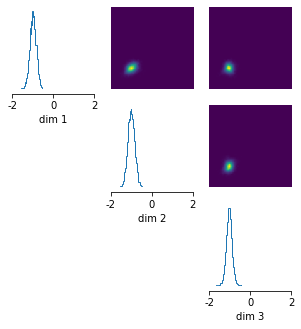

In [4]:
# plot posterior samples
_ = utils.pairplot(posterior_samples, limits=[[-2,2],[-2,2],[-2,2]], 
                   fig_size=(5,5))